# Project 2
## B-IT Pattern Recognition



Presented on 07-Jan-2016 by:

- Abdullah Abdullah

- Can Güney Aksakallı

- Kang Cifong

- Umut Hatipoğlu

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

import pattrex.plotting_mpl as plt_rex
import pattrex.preprocessing as pre_rex
import pattrex.fitting as fit_rex

from pattrex.demo_helper import read_whdata

In [2]:
# Read data
ws, hs, gs = read_whdata()
HW = np.vstack((hs, ws)).astype(np.float)

# removing outliers
HW_new, neg_idx = pre_rex.only_all_positive(HW, True, return_neg_idx=True)

# unknown
hu = np.array([h for i, h in enumerate(hs) if i in neg_idx])

hn = HW_new[0, :]
wn = HW_new[1, :]

In [67]:
qx = np.random.uniform(30, 50, 90)
qx = np.hstack((qx, np.random.uniform(-50, -45, 10)))
qy = np.power(qx, 2) + np.random.uniform(-225, 225, 100)
qx = np.hstack((qx, np.array([1, 2, 3, 5, 12])))
qy = np.hstack((qy, np.array([10, 15, 20, 10, 11])))

qu = np.array([11, 22, 33, 44])

## Task 2.1
### Least Squares Regression

- We are assuming that Weight is a function of Height

- We are assuming that the function is an nth degree polynomial

- We use `numpy.linalg.lstsq(...)` to do the job for us
    
    + If doing *manually*, one can use `numpy.linalg.pinv(...)` to calculate the Moore-Penrose pseudo-inverse

In [48]:
def demo_1(x, y, u, degrees):
    
    # fit polynomial of degrees 1...10
    results = []
    for degree in range(1, max(degrees)+1):
        results.append(
            fit_rex.fit_polynomial_nplstsq(x, y, degree
                                           , x_pad=50
                                           , X_unknown=u))
        
    # # pretty print and plot results for [1, 5, 10] ###########
    coeffs = []
    coeffs_string = "{}: "
    
    preds = []
    preds_string = "{}: "
    
    fig = plt.figure(figsize=(12, 8))
    axs = fig.add_subplot(111)
    
    XY_ = np.vstack((x, y))
    xmin, ymin = XY_.min(axis=1)
    xmax, ymax = XY_.max(axis=1)

    xlim = [xmin-50, xmax+50]
    ylim = [ymin-50, ymax+50]

    # plot data
    plt_rex.plot2d(XY_, colwise_data=True, 
                   hatch='o', color='lavender',
                   x_lim=xlim, y_lim=ylim, 
                   show=False, axs=axs, plotlabel="data")

    # plot unkown vertical lines
    for h in u:
        axs.axvline(x=h, color='thistle')
        
    for degree in degrees:
        res = results[degree-1]
        
        coeffs.append(res[0])
        
        preds.append(res[2][1])
        preds_string += "{:4.3} |"
        
        line = res[1]
        pred = res[2]
        
        plt_rex.plot2d(np.vstack(line), colwise_data=True,
                      hatch='-',
                      show=False, axs=axs,
                      plotlabel=str(degree))
        plt_rex.plot2d(np.vstack(pred), colwise_data=True,
                      hatch='o',
                      show=False, axs=axs,
                      plotlabel=str(degree)+" pred")
        
    print("Coefficients")
    print("\n\n".join("{}".format(c) for c in coeffs))
    print()
    print("Predictions " + str(degrees))
    print("\n".join(preds_string.format(*p) for p in zip(u, *preds)))

Coefficients
[-209.32503027    1.61805916]

[ -2.42736271e+02   2.00365675e+00  -1.11060527e-03]

[  1.45372950e+02   5.00648642e+03  -1.15279840e+02   9.94128981e-01
  -3.80603682e-03   5.45891635e-06]

[  1.30258110e-06   9.54928046e-05   5.52169250e-03   1.90340817e-01
  -4.38414360e-03   3.78208524e-05  -1.44853576e-07   2.07836521e-10]

[  3.39741629e-19   1.17900058e-11  -9.63490518e-15   2.89518900e-13
   2.13966507e-11   1.23047796e-09   4.24710787e-08  -9.78013259e-10
   8.43625378e-12  -3.23109114e-14   4.63624155e-17]

Predictions [1, 2, 5, 7, 10]
168.0: 62.5 |62.5 |58.8 |58.4 |58.0 |
172.0: 69.0 |69.0 |69.7 |69.5 |69.5 |
167.0: 60.9 |60.9 |56.1 |55.7 |55.5 |


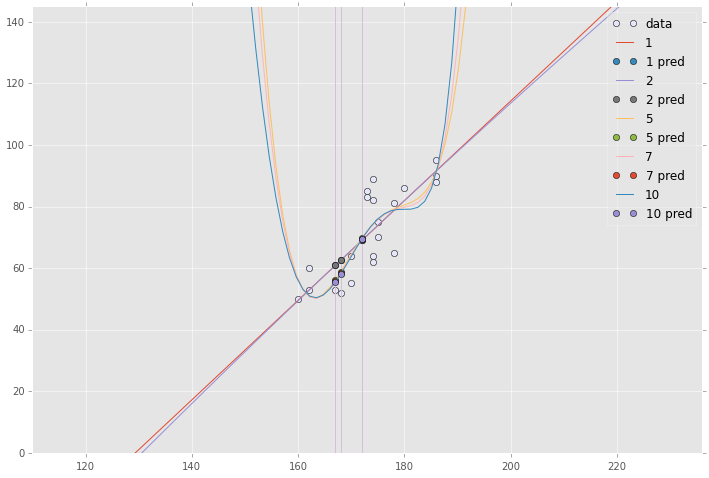

In [49]:
demo_1(hn, wn, hu, [1, 2, 5, 7, 10])

Coefficients
[ 1652.61667283    -2.33858377]

[ 3.64781457  0.10781022  0.99820374]

[ -1.14070010e+01  -1.36010090e+00   1.05526348e+00   1.18761169e-03
  -2.32977969e-05  -2.75970703e-07]

Predictions [1, 2, 5]
11: 1.63e+03 |1.26e+02 |1.03e+02 |
22: 1.6e+03 |4.89e+02 |4.75e+02 |
33: 1.58e+03 |1.09e+03 |1.1e+03 |
44: 1.55e+03 |1.94e+03 |1.94e+03 |


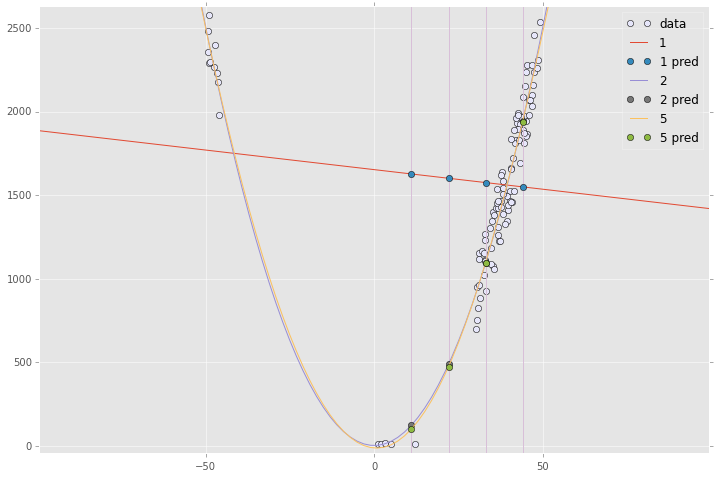

In [68]:
demo_1(qx, qy, qu, [1, 2, 5])